In [3]:
%%html
<script>
  function hideAllCells() {
    var cells = document.getElementsByClassName("cell");
    for (var i = 0; i < cells.length; i++) {
      cells[i].style.display = "none";
    }
  }

  function showNextCell() {
    var cells = document.getElementsByClassName("cell");
    for (var i = 0; i < cells.length; i++) {
      if (cells[i].style.display == "none") {
        cells[i].style.display = "";
        return;
      }
    }
  }

  document.addEventListener("keydown", function(event) {
    if (event.keyCode == 39) { // Right arrow key
      showNextCell();
    }
  });

  hideAllCells();
  showNextCell();
</script>


In [ ]:
jupyter_settings()

%pylab is deprecated, use %matplotlib inline and import the required libraries.
Populating the interactive namespace from numpy and matplotlib


c:\Users\raquel\anaconda3\envs\ds_em_producao\lib\site-packages\IPython\core\magics\pylab.py:162: UserWarning: pylab import has clobbered these variables: ['random']
`%matplotlib` prevents importing * from pylab and numpy
  warn("pylab import has clobbered these variables: %s"  % clobbered +


# <font color='blue'> Predições de Vendas das Lojas ROSSMANN </font>

# Agenda

1. Contexto
2. Desafio
3. Desenvolvimento da Solução
4. Conclusão & Demonstração
5. Próximos Passos


# <font color='blue'> 1. Contexto </font>

- Reunião Mensal de Resultados
- CFO pediu uma Previsão de Vendas das Próximas 6 semanas de cada Loja

# <font color='blue'> 2. Desafio </font>

# Problema
- Definição do Budget para a Reforma das Lojas.

# Causas
- Predição de Vendas Atual apresentada muita Divergencia
- O processo de Predição de Vendas é baseado em Experiencias Passadas.
- Todo a Previsão de Vendas é feita Manualmente pelas 1.115 Lojas da Rossmann.
- A visualização das Vendas é Limitada ao Computador.

# Solução
- Usar Machine Learning para realizar a Previsão de Vendas de Todas as Lojas
- Visualização das Predições de Vendas poderão ser feitas pelo Smartphone

# <font color='blue'> 3. Desenvolvimento da Solução </font>

# DESCRICAO DOS DADOS

# Descriptive Statistics

In [ ]:
# Central Tendency - mean, median
ct1 = pd.DataFrame(num_attributes.apply(np.mean)).T
ct2 = pd.DataFrame(num_attributes.apply(np.median)).T

# Dispersion - std, min, max, range, skew, kurtosis
d1 = pd.DataFrame(num_attributes.apply(np.std)).T
d2 = pd.DataFrame(num_attributes.apply(min)).T
d3 = pd.DataFrame(num_attributes.apply(max)).T
d4 = pd.DataFrame(num_attributes.apply(lambda x: x.max() - x.min())).T
d5 = pd.DataFrame(num_attributes.apply(lambda x: x.skew())).T
d6 = pd.DataFrame(num_attributes.apply(lambda x: x.kurtosis())).T

# Concatena todos os dataframes criados anteriormente
metrics = pd.concat([d2, d3, d4, ct1, ct2, d1, d5, d6]).T.reset_index()

# Renomeia as colunas
metrics.columns = ['attributes', 'min', 'max', 'range', 'mean', 'median', 'std', 'skew', 'kurtosis']

metrics


,attributes,min,max,range,mean,median,std,skew,kurtosis
0,store,1.0,1115.0,1114.0,558.429727,558.0,321.908493,-0.000955,-1.200524
1,day_of_week,1.0,7.0,6.0,3.998341,4.0,1.997390,0.001593,-1.246873
2,sales,0.0,41551.0,41551.0,5773.818972,5744.0,3849.924283,0.641460,1.778375
3,customers,0.0,7388.0,7388.0,633.145946,609.0,464.411506,1.598650,7.091773
4,open,0.0,1.0,1.0,0.830107,1.0,0.375539,-1.758045,1.090723
5,promo,0.0,1.0,1.0,0.381515,0.0,0.485758,0.487838,-1.762018
6,school_holiday,0.0,1.0,1.0,0.178647,0.0,0.383056,1.677842,0.815154
7,competition_distance,20.0,200000.0,199980.0,5935.442677,2330.0,12547.646829,10.242344,147.789712
8,competition_open_since_month,1.0,12.0,11.0,6.786849,7.0,3.311085,-0.042076,-1.232607
9,competition_open_since_year,1900.0,2015.0,115.0,2010.324840,2012.0,5.515591,-7.235657,124.071304


# Mapa Mental de Hipóteses

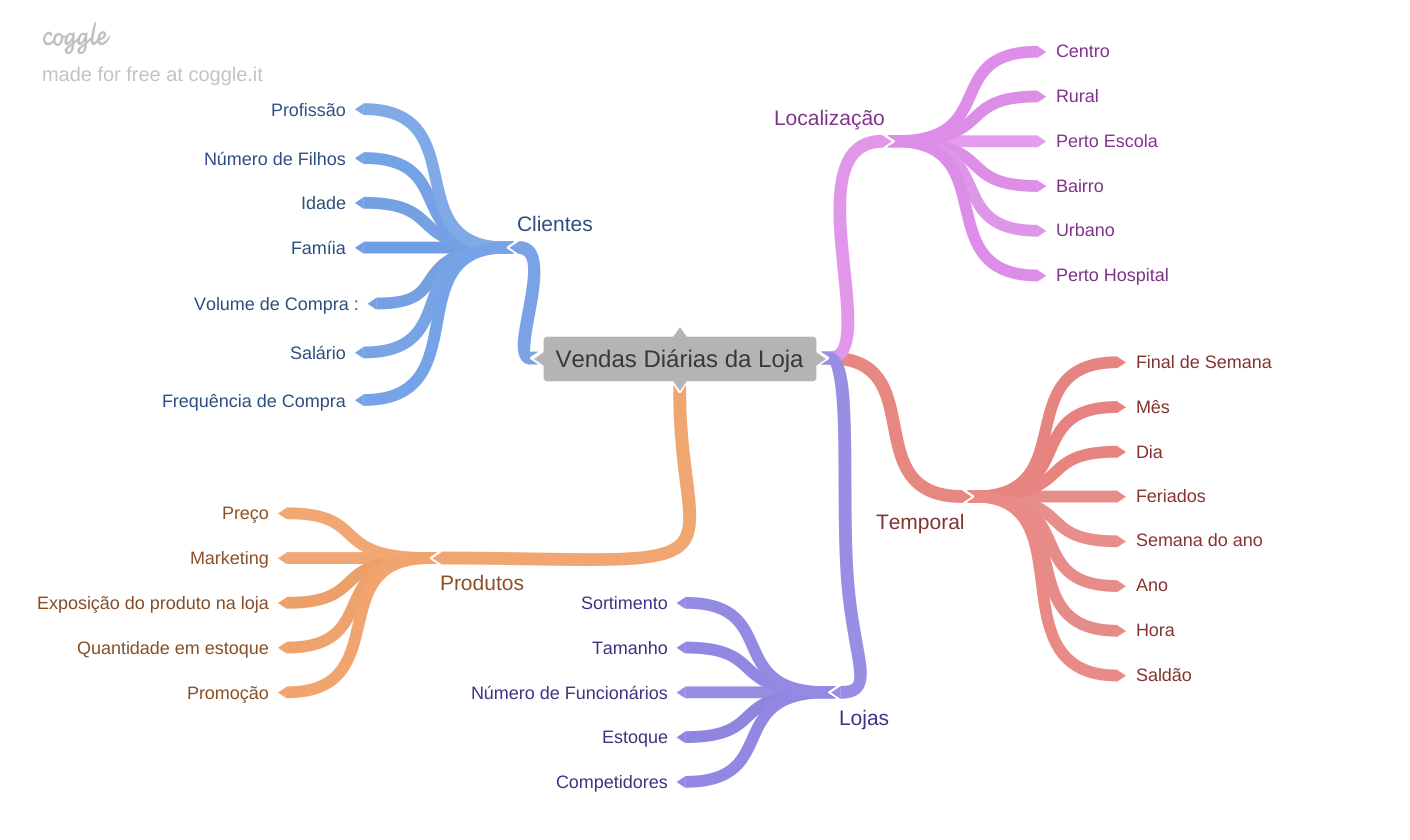

In [ ]:
Image( 'img/Vendas_Dirias_da_Loja.png' )

# Hipóteses Da Análise Exploratória

**1.** Lojas com maior sortimentos deveriam vender mais.

**2.** Lojas com competidores mais próximos deveriam vender menos.

**3.** Lojas com competidores à mais tempo deveriam vendem mais.

**4.** Lojas com promoções ativas por mais tempo deveriam vender mais.

**5.** Lojas com mais dias de promoção deveriam vender mais.

**7.** Lojas com mais promoções consecutivas deveriam vender mais.

**8.** Lojas abertas durante o feriado de Natal deveriam vender mais.

**9.** Lojas deveriam vender mais ao longo dos anos.

**10.** Lojas deveriam vender mais no segundo semestre do ano.

**11.** Lojas deveriam vender mais depois do dia 10 de cada mês.

**12.** Lojas deveriam vender menos aos finais de semana.

**13.** Lojas deveriam vender menos durante os feriados escolares.


# ANÁLISE EXPLORATÓRIA DOS DADOS

<Axes: xlabel='sales'>

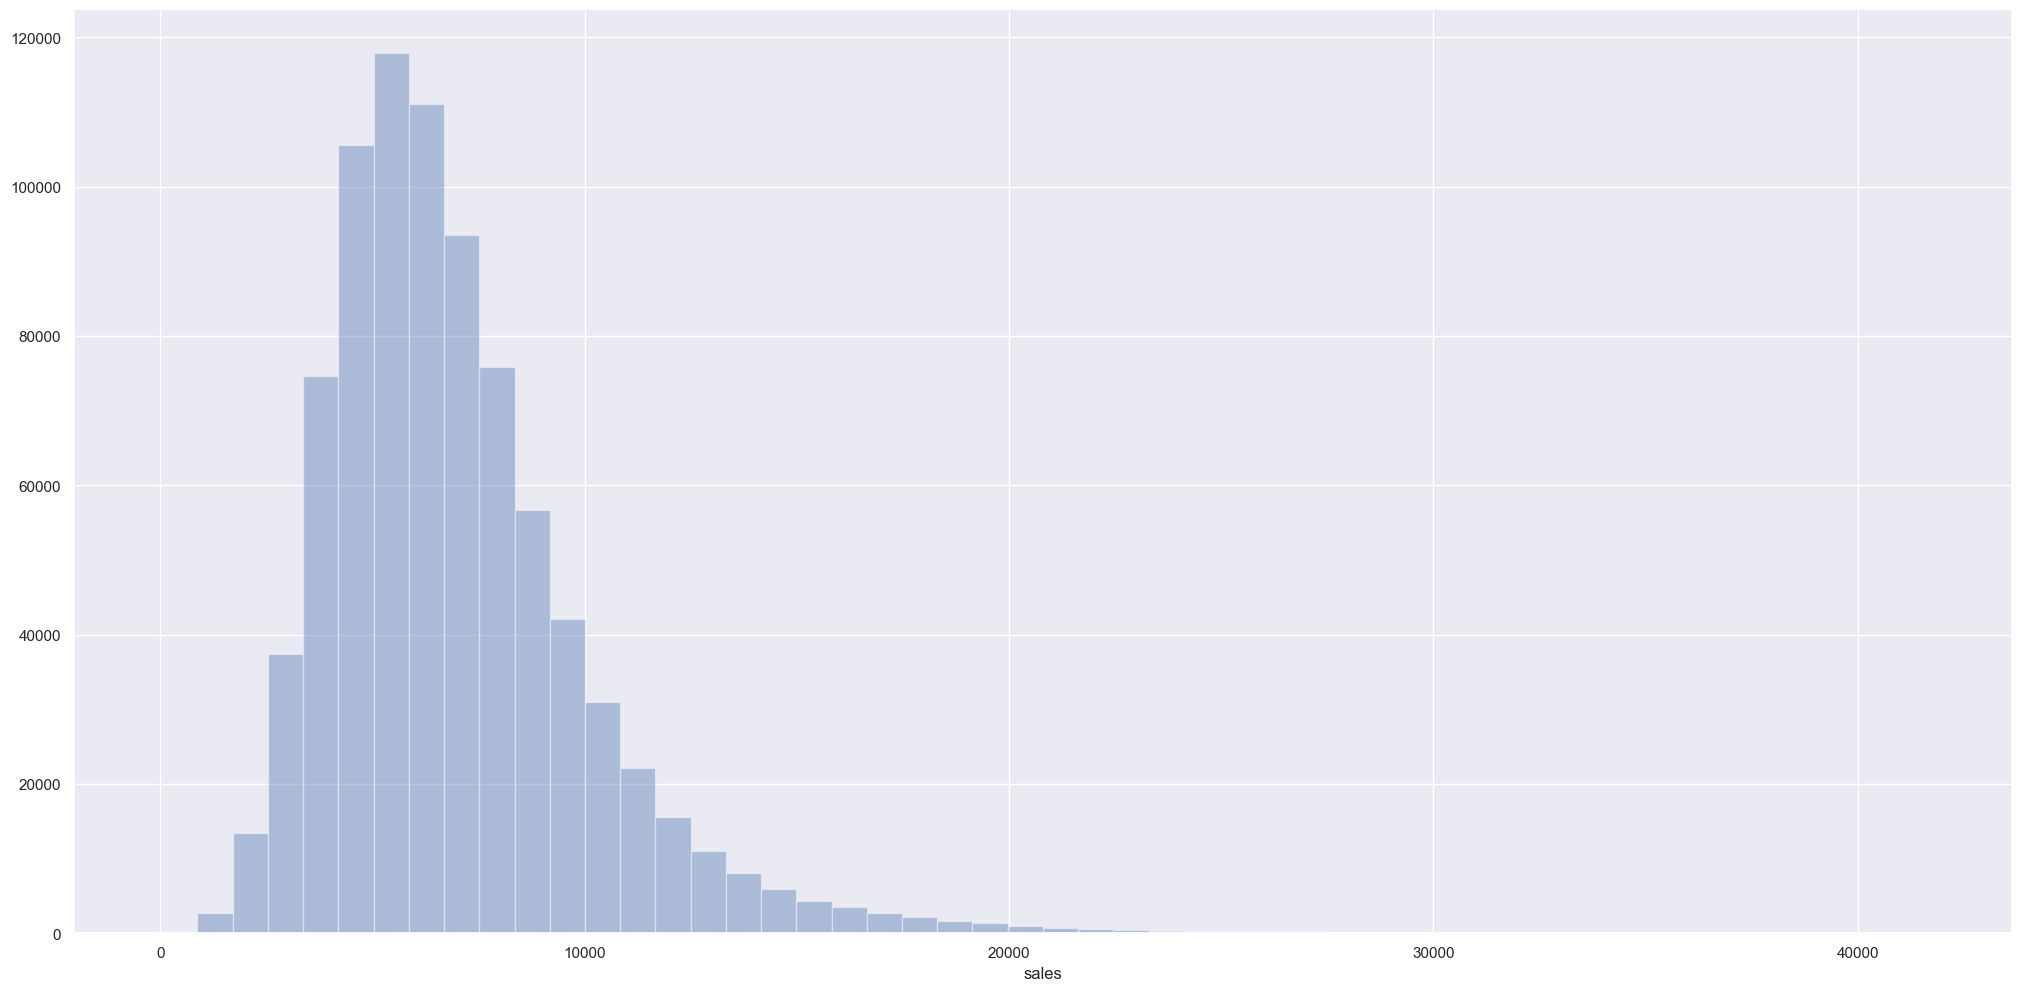

In [ ]:
sns.distplot( df4['sales'], kde=False )

# Numerical Variable

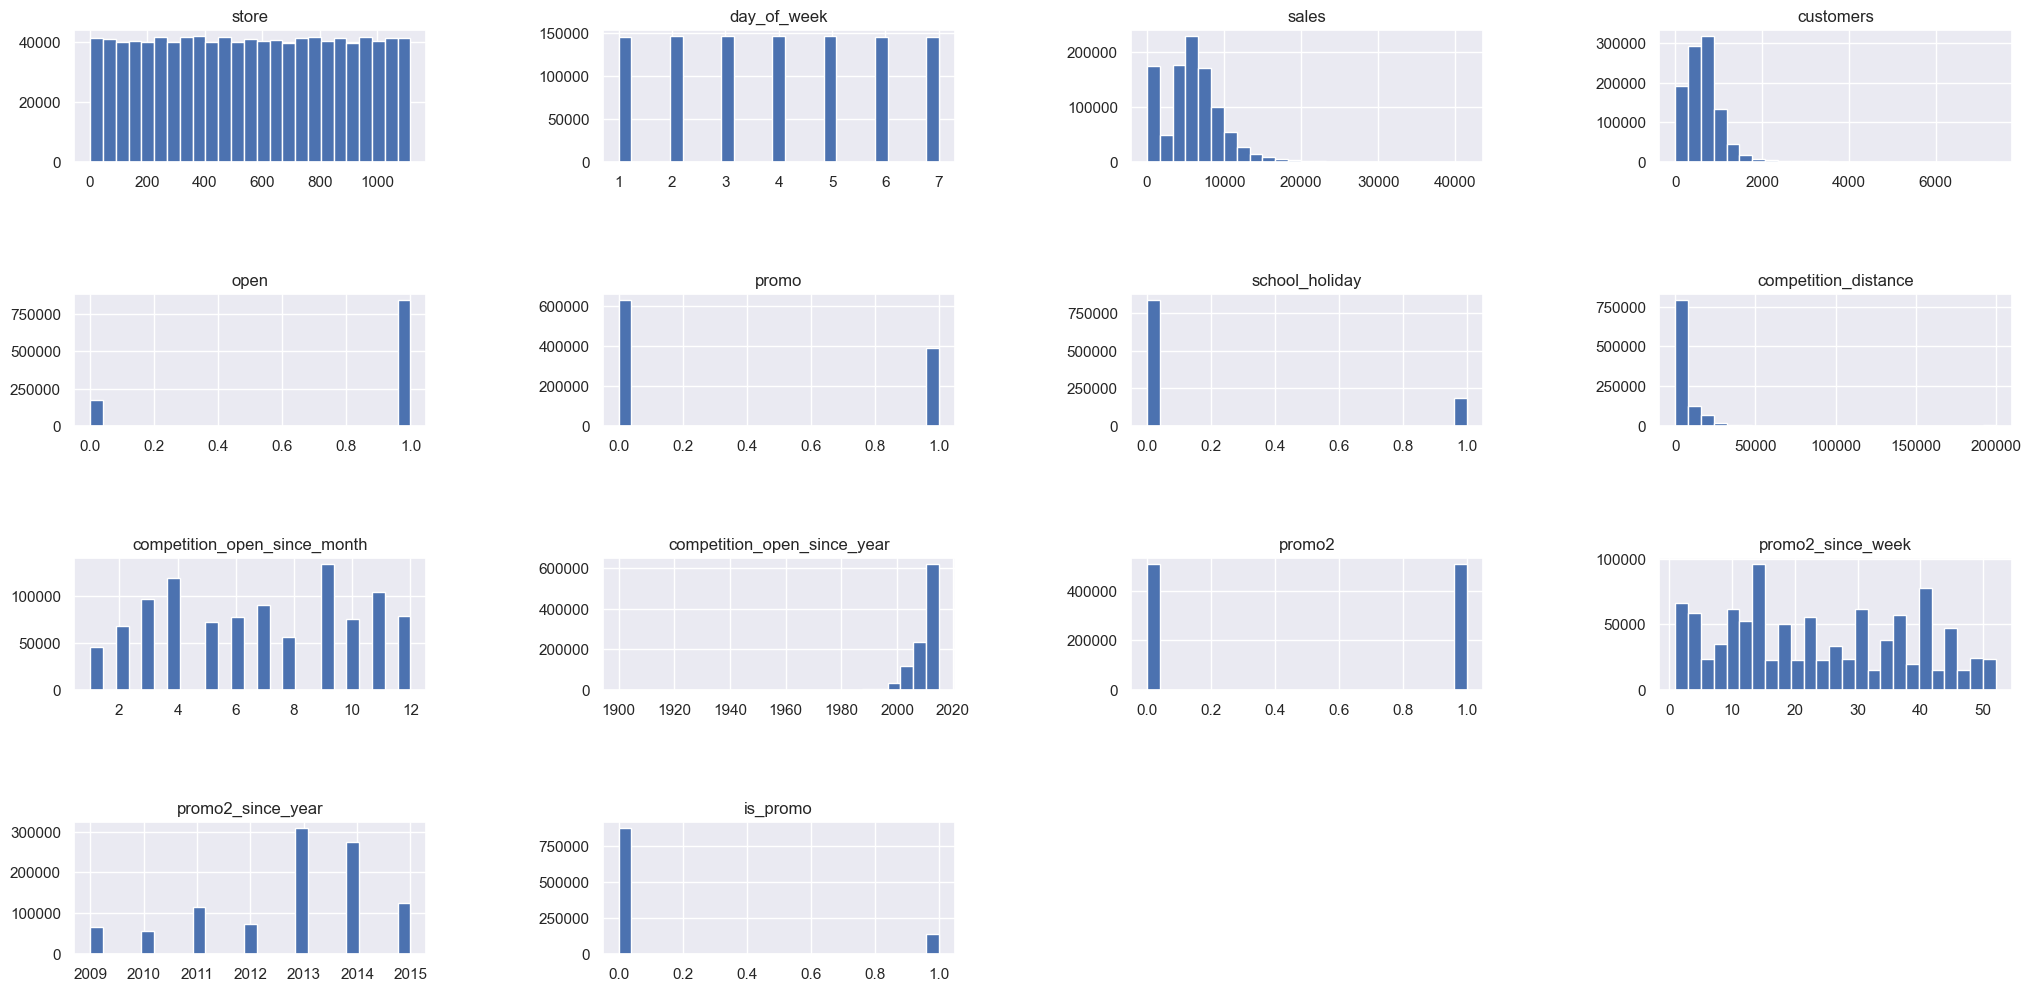

In [ ]:
num_attributes.hist(bins=25);
plt.subplots_adjust(hspace=1, wspace=0.5);

# Categorical Variable

AttributeError: module 'seaborn' has no attribute 'histplot'

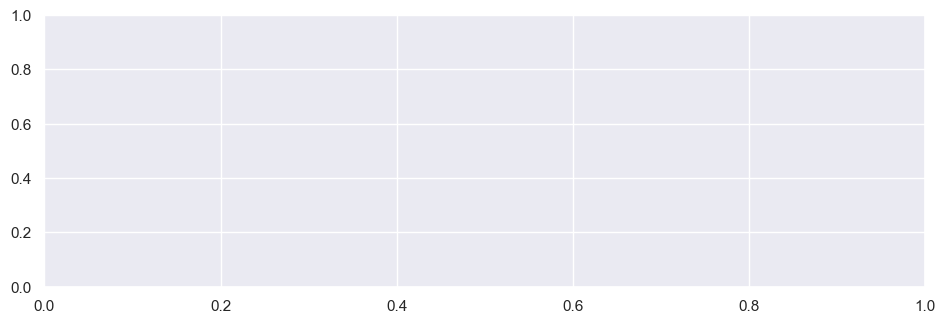

In [ ]:
# state_holiday

# Plot 1: histograma com as vendas nos feriados
plt.subplot(3, 2, 1)
a = df4[df4['state_holiday'] != 'regular_day'] # Seleciona apenas os dias de feriado
sns.histplot(a, x='state_holiday', hue='state_holiday', legend=False, discrete=True) # Plota o histograma com os dias de feriado

# Plot 2: distribuição de vendas para cada tipo de feriado
plt.subplot(3, 2, 2)
sns.kdeplot(df4[df4['state_holiday'] == 'public_holiday']['sales'], label='public_holiday', fill=True) # Plota o kernel density estimate (KDE) para o feriado público
sns.kdeplot(df4[df4['state_holiday'] == 'easter_holiday']['sales'], label='easter_holiday', fill=True) # Plota o KDE para o feriado de páscoa
sns.kdeplot(df4[df4['state_holiday'] == 'christmas']['sales'], label='christmas', fill=True) # Plota o KDE para o feriado de Natal

# store_type
# Plot 3: histograma com o número de lojas para cada tipo de loja
plt.subplot(3, 2, 3)
sns.histplot(df4, x='store_type', hue='store_type', legend=False, discrete=True) # Plota o histograma com o número de lojas para cada tipo de loja

# Plot 4: distribuição de vendas para cada tipo de loja
plt.subplot(3, 2, 4)
sns.kdeplot(df4[df4['store_type'] == 'a']['sales'], label='a', fill=True) # Plota o KDE para as lojas do tipo a
sns.kdeplot(df4[df4['store_type'] == 'b']['sales'], label='b', fill=True) # Plota o KDE para as lojas do tipo b
sns.kdeplot(df4[df4['store_type'] == 'c']['sales'], label='c', fill=True) # Plota o KDE para as lojas do tipo c
sns.kdeplot(df4[df4['store_type'] == 'd']['sales'], label='d', fill=True) # Plota o KDE para as lojas do tipo d

# assortment
# Plot 5: histograma com o número de lojas para cada tipo de surtido
plt.subplot(3, 2, 5)
sns.histplot(df4, x='assortment', hue='assortment', legend=False, discrete=True) # Plota o histograma com o número de lojas para cada tipo de surtido

# Plot 6: distribuição de vendas para cada tipo de surtido
plt.subplot(3, 2, 6)
sns.kdeplot(df4[df4['assortment'] == 'extended']['sales'], label='extended', fill=True) # Plota o KDE para o surtido estendido
sns.kdeplot(df4[df4['assortment'] == 'basic']['sales'], label='basic', fill=True) # Plota o KDE para o surtido básico
sns.kdeplot(df4[df4['assortment'] == 'extra']['sales'], label='extra', fill=True) # Plota o KDE para o surtido extra

plt.subplots_adjust(hspace=1, wspace=0.5);



# Validação das Hipóteses

##### H2. Lojas com competidores mais próximos deveriam vender menos.

**Insight 01 - Lojas próximas aos seus concorrentes têm um volume de vendas mais elevado.**

C:\Users\raquel\AppData\Local\Temp\ipykernel_19684\1101030001.py:23: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  x = sns.heatmap(aux1.corr(method='pearson'), annot=True);


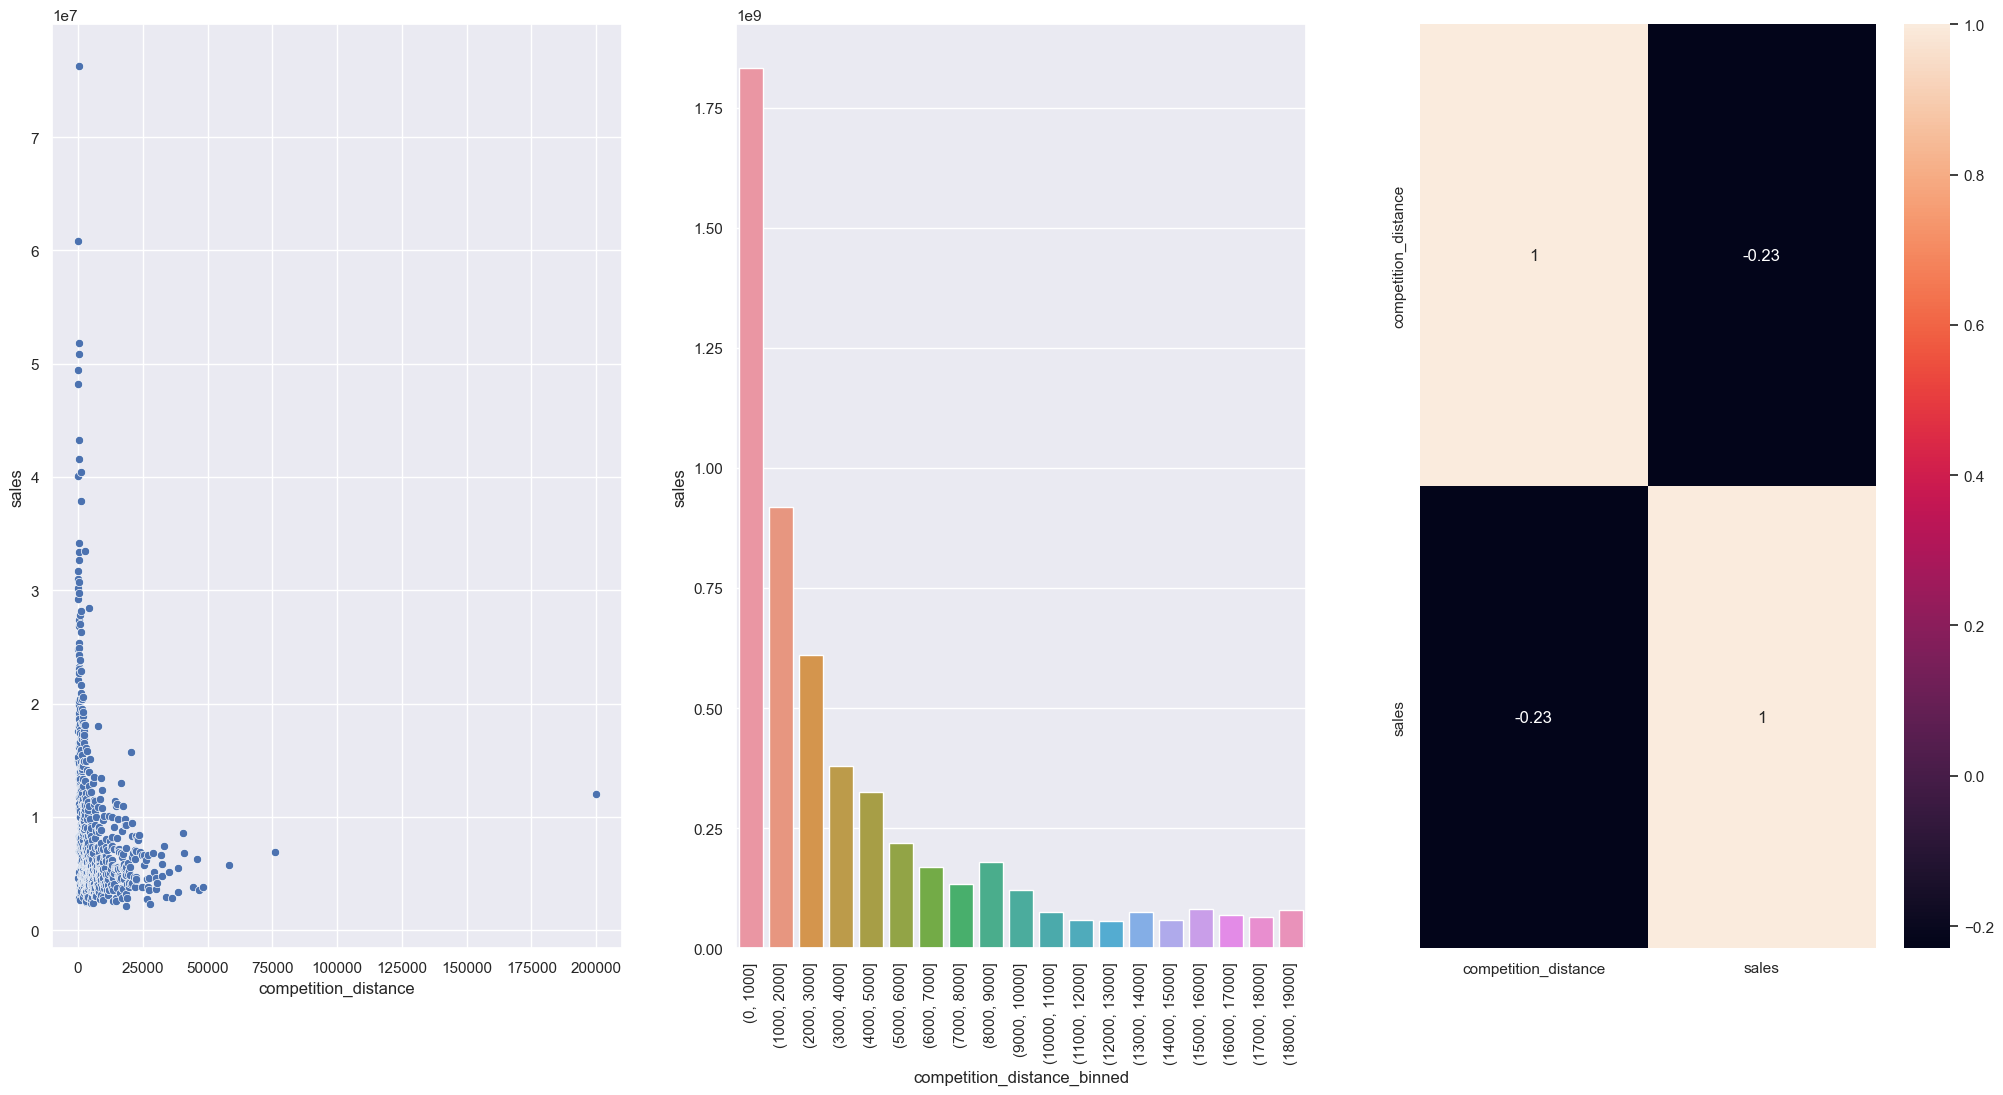

In [ ]:
# aux1: total de vendas agrupado pela distância para o concorrente mais próximo
aux1 = df4[['competition_distance', 'sales']].groupby('competition_distance').sum().reset_index()

# Gráfico de dispersão da distância para o concorrente mais próximo versus o total de vendas
plt.subplot(1, 3, 1)
sns.scatterplot(x ='competition_distance', y='sales', data=aux1);

# aux1 com as distâncias agrupadas em intervalos de 1000 metros
plt.subplot(1, 3, 2)
bins = list(np.arange(0, 20000, 1000))
aux1['competition_distance_binned'] = pd.cut(aux1['competition_distance'], bins=bins)

# aux2: total de vendas agrupado pelos intervalos de distância
aux2 = aux1[['competition_distance_binned', 'sales']].groupby('competition_distance_binned').sum().reset_index()

# Gráfico de barras mostrando a relação entre os intervalos de distância e o total de vendas
sns.barplot(x='competition_distance_binned', y='sales', data=aux2);
plt.xticks(rotation=90);

# Gráfico de calor mostrando a correlação entre a distância para o concorrente mais próximo e o total de vendas
plt.subplot(1, 3, 3)
x = sns.heatmap(aux1.corr(method='pearson'), annot=True);



##### H3. Lojas com competidores há mais tempo deveriam vendem mais.

**Insight 02 - Lojas com concorrentes de longa data tendem a vender menos.**

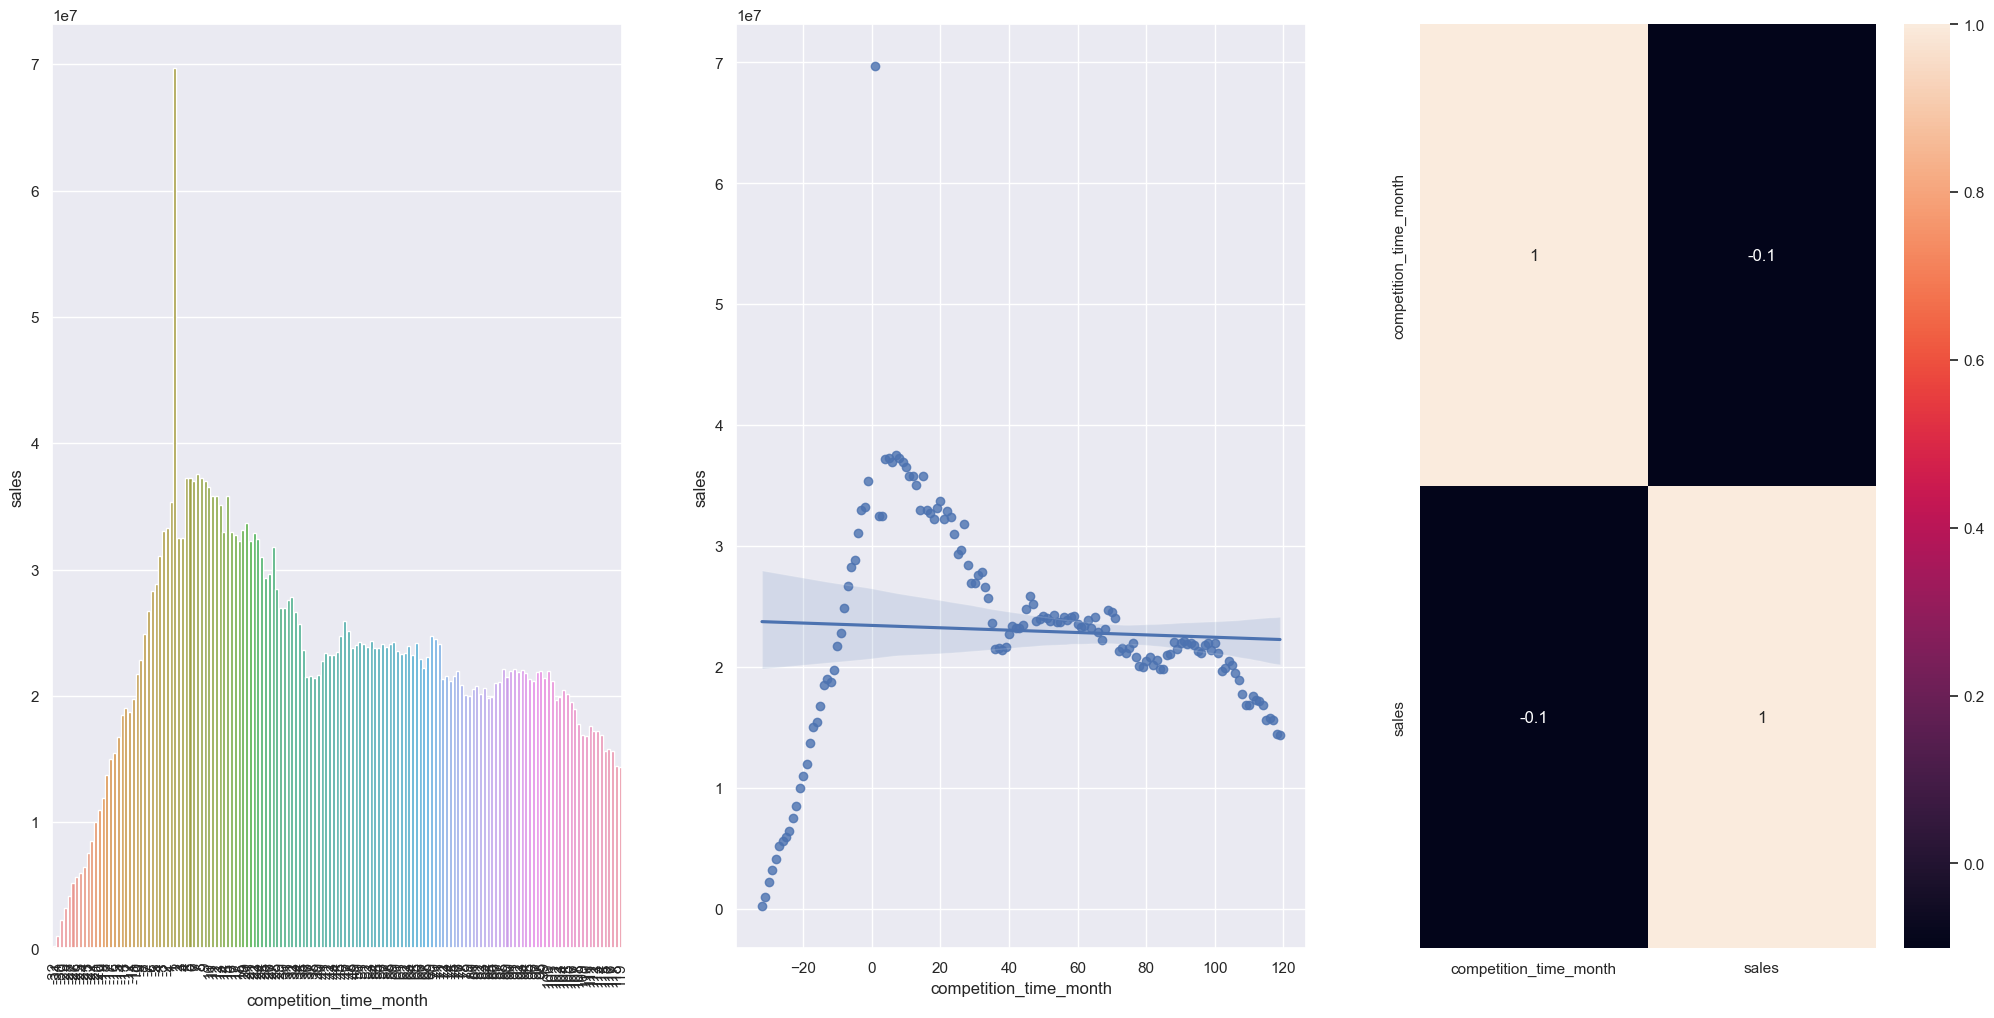

In [ ]:
# Criando o subplot com 1 linha e 3 colunas
plt.subplot(1, 3, 1)

# Agrupando as vendas por tempo de competição do concorrente em meses
aux1 = df4[['competition_time_month', 'sales']].groupby('competition_time_month').sum().reset_index()

# Removendo os dados que possuem tempo de competição maior que 120 meses e igual a 0
aux2 = aux1[(aux1['competition_time_month'] < 120) & (aux1['competition_time_month'] != 0)]

# Criando o gráfico de barras com tempo de competição em meses no eixo x e vendas no eixo y
sns.barplot(x='competition_time_month', y='sales', data=aux2)
plt.xticks(rotation=90)

# Criando o subplot central
plt.subplot(1, 3, 2)

# Criando um gráfico de regressão linear com tempo de competição em meses no eixo x e vendas no eixo y
sns.regplot(x='competition_time_month', y='sales', data=aux2)

# Criando o subplot da direita
plt.subplot(1, 3, 3)

# Criando um heatmap da correlação entre o tempo de competição do concorrente em meses e as vendas
x = sns.heatmap(aux1.corr(method='pearson'), annot=True)


##### H4. Lojas com promoções ativas por mais tempo deveriam vender mais.


**Insight 03 - Lojas que realizam promoções prolongadas têm um volume de vendas inferior.**

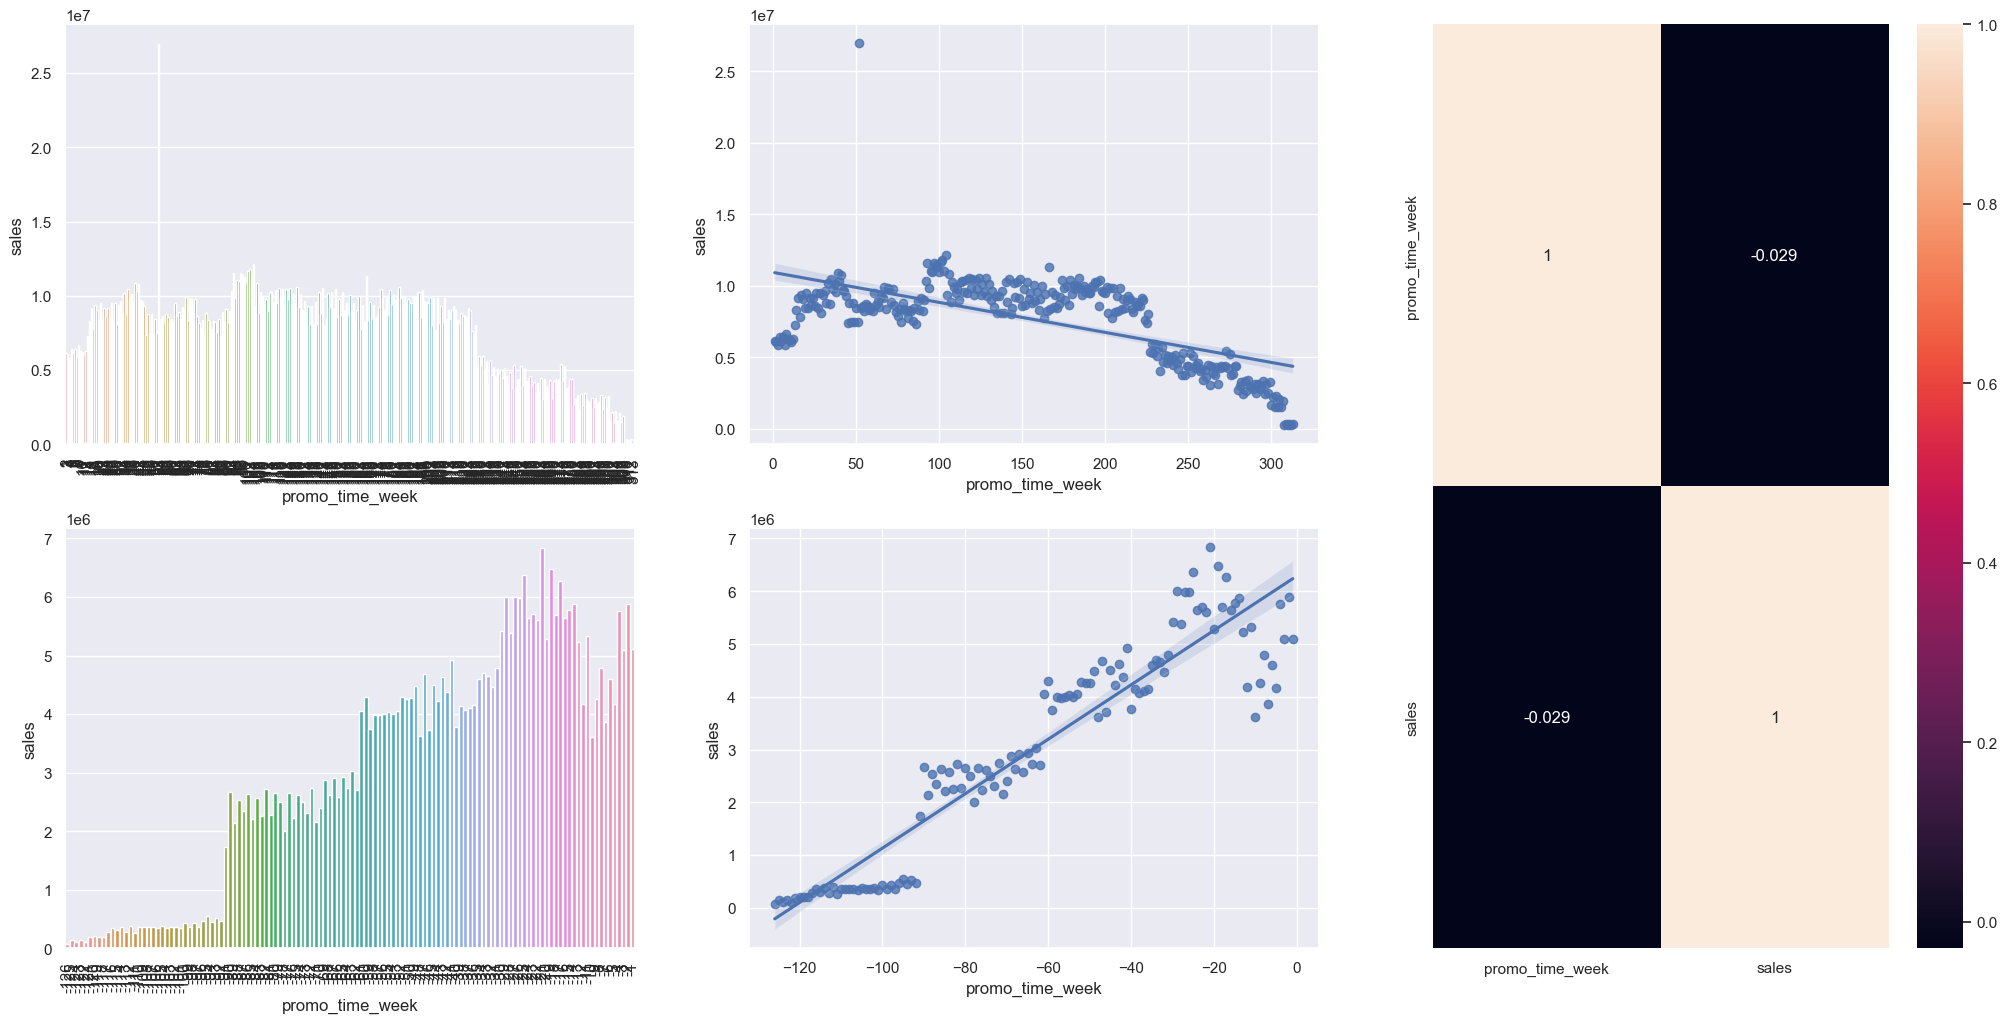

In [ ]:
# Criar um dataframe com as colunas 'promo_time_week' e 'sales' e agrupar por 'promo_time_week'
aux1 = df4[['promo_time_week', 'sales']].groupby('promo_time_week').sum().reset_index()

# Criar uma grade com 2 linhas e 3 colunas
grid = plt.GridSpec(2, 3)

# Gráfico 1: Barras para as promoções estendidas
plt.subplot(grid[0,0])
aux2 = aux1[aux1['promo_time_week'] > 0] # selecionar promoções estendidas
sns.barplot(x='promo_time_week', y='sales', data=aux2) # plotar gráfico de barras
plt.xticks(rotation=90) # girar os rótulos do eixo x em 90 graus para melhorar a legibilidade

# Gráfico 2: Regressão para as promoções estendidas
plt.subplot(grid[0,1])
sns.regplot(x='promo_time_week', y='sales', data=aux2) # plotar gráfico de regressão

# Gráfico 3: Barras para as promoções regulares
plt.subplot(grid[1,0])
aux3 = aux1[aux1['promo_time_week'] < 0] # selecionar promoções regulares
sns.barplot(x='promo_time_week', y='sales', data=aux3) # plotar gráfico de barras
plt.xticks(rotation=90) # girar os rótulos do eixo x em 90 graus para melhorar a legibilidade

# Gráfico 4: Regressão para as promoções regulares
plt.subplot(grid[1,1])
sns.regplot(x='promo_time_week', y='sales', data=aux3) # plotar gráfico de regressão

# Gráfico 5: Heatmap da correlação entre as variáveis do dataframe 'aux1'
plt.subplot(grid[:,2])
sns.heatmap(aux1.corr(method='pearson'), annot=True) # plotar heatmap com anotações dos valores

##### H8. Lojas deveriam vender mais ao longo dos anos.


**Insight 04 - As lojas apresentam uma tendência de redução nas vendas anuais. Em 2014, o volume de vendas foi inferior ao registrado em 2013 e, até o momento, os dados preliminares indicam que o desempenho de vendas em 2015 é ainda menor. É importante destacar que os dados de 2015 ainda não estão completos, o que pode impactar nas conclusões finais.**

<Axes: >

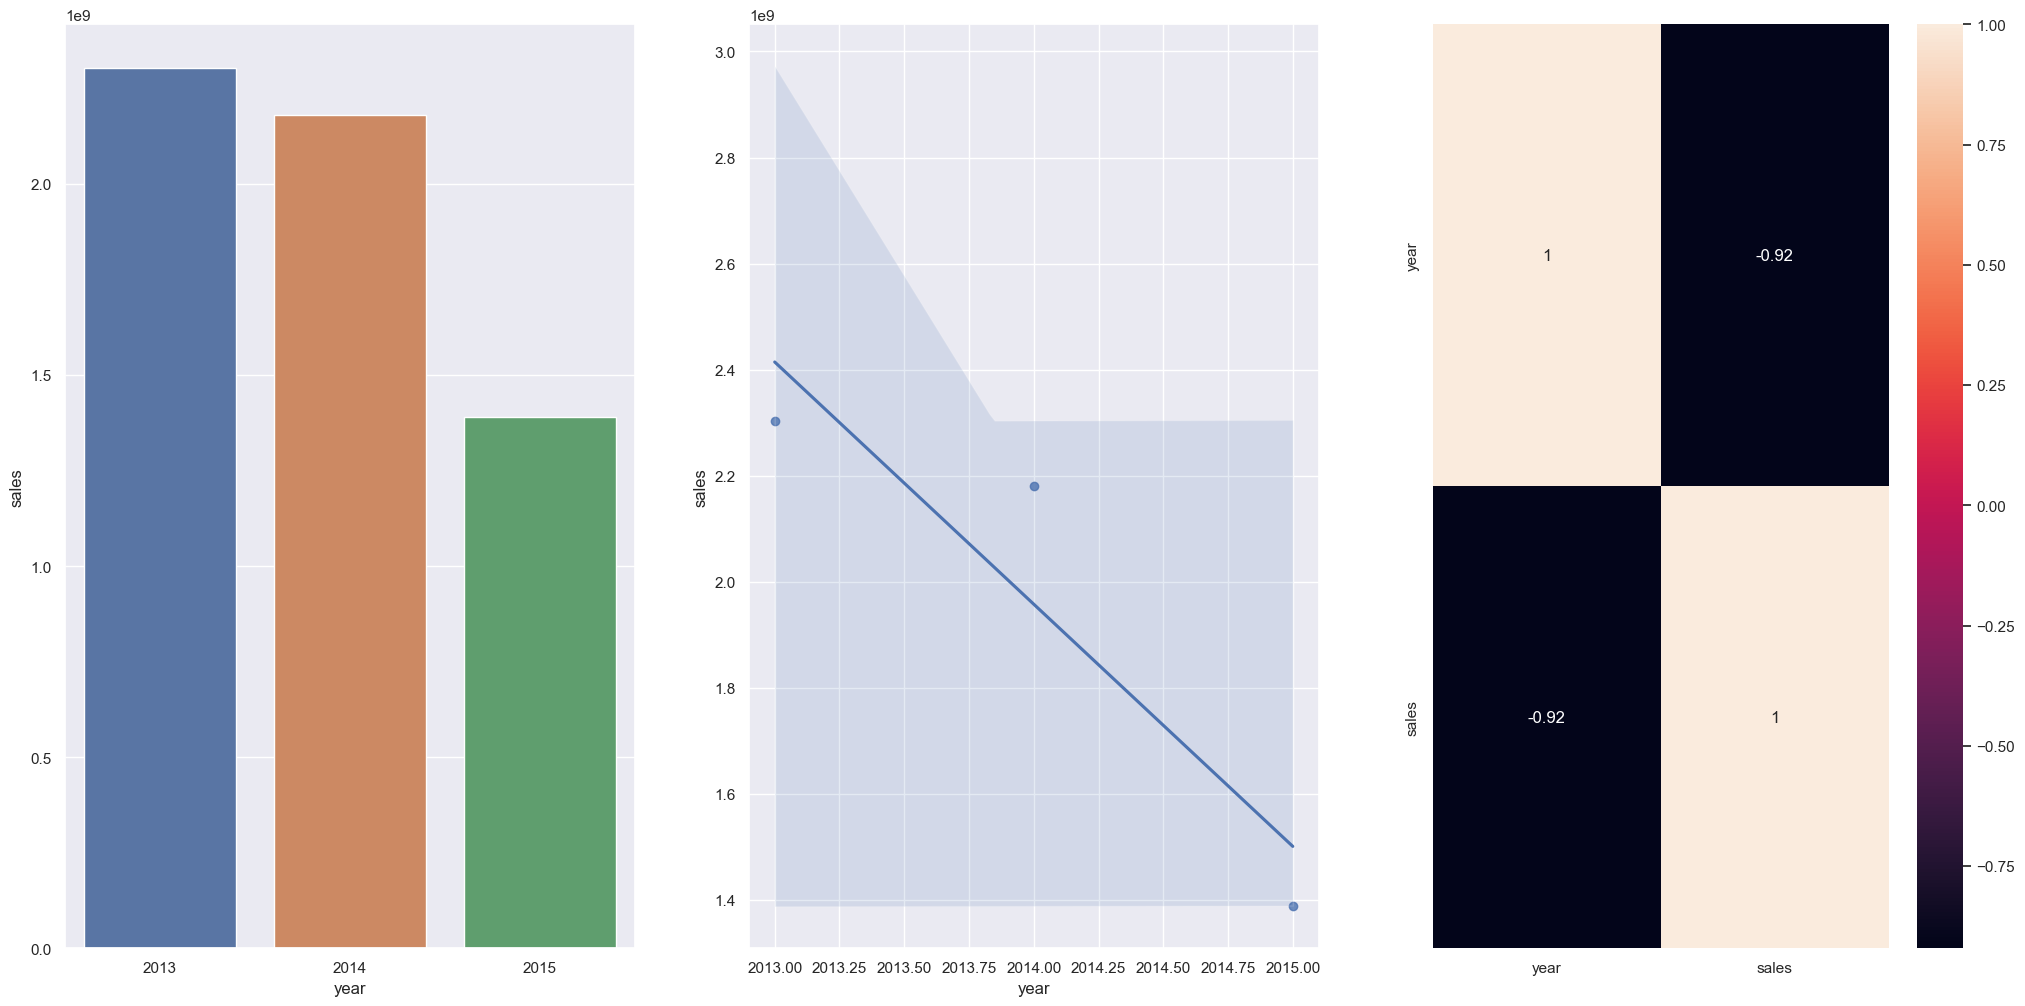

In [ ]:
# Criação de um dataframe auxiliar aux1 que agrupa as vendas por ano e soma as vendas em cada grupo
aux1 = df4[['year', 'sales']].groupby('year').sum().reset_index()

# Gráfico 1: Total de vendas por ano
plt.subplot(1, 3, 1)
sns.barplot(x='year', y='sales', data=aux1)

# Gráfico 2: Regressão linear entre ano e vendas
plt.subplot(1, 3, 2)
sns.regplot(x='year', y='sales', data=aux1)

# Gráfico 3: Correlação entre ano e vendas
plt.subplot(1, 3, 3)
sns.heatmap(aux1.corr(method='pearson'), annot=True)


##### H9. Lojas deveriam vender mais no segundo semestre do ano.


**Insight 05 - As lojas apresentam uma redução no volume de vendas no segundo semestre do ano, em comparação com o primeiro semestre, o que pode estar relacionado a fatores sazonais ou à diminuição geral do consumo nesse período.**

<Axes: xlabel='month', ylabel='sales'>

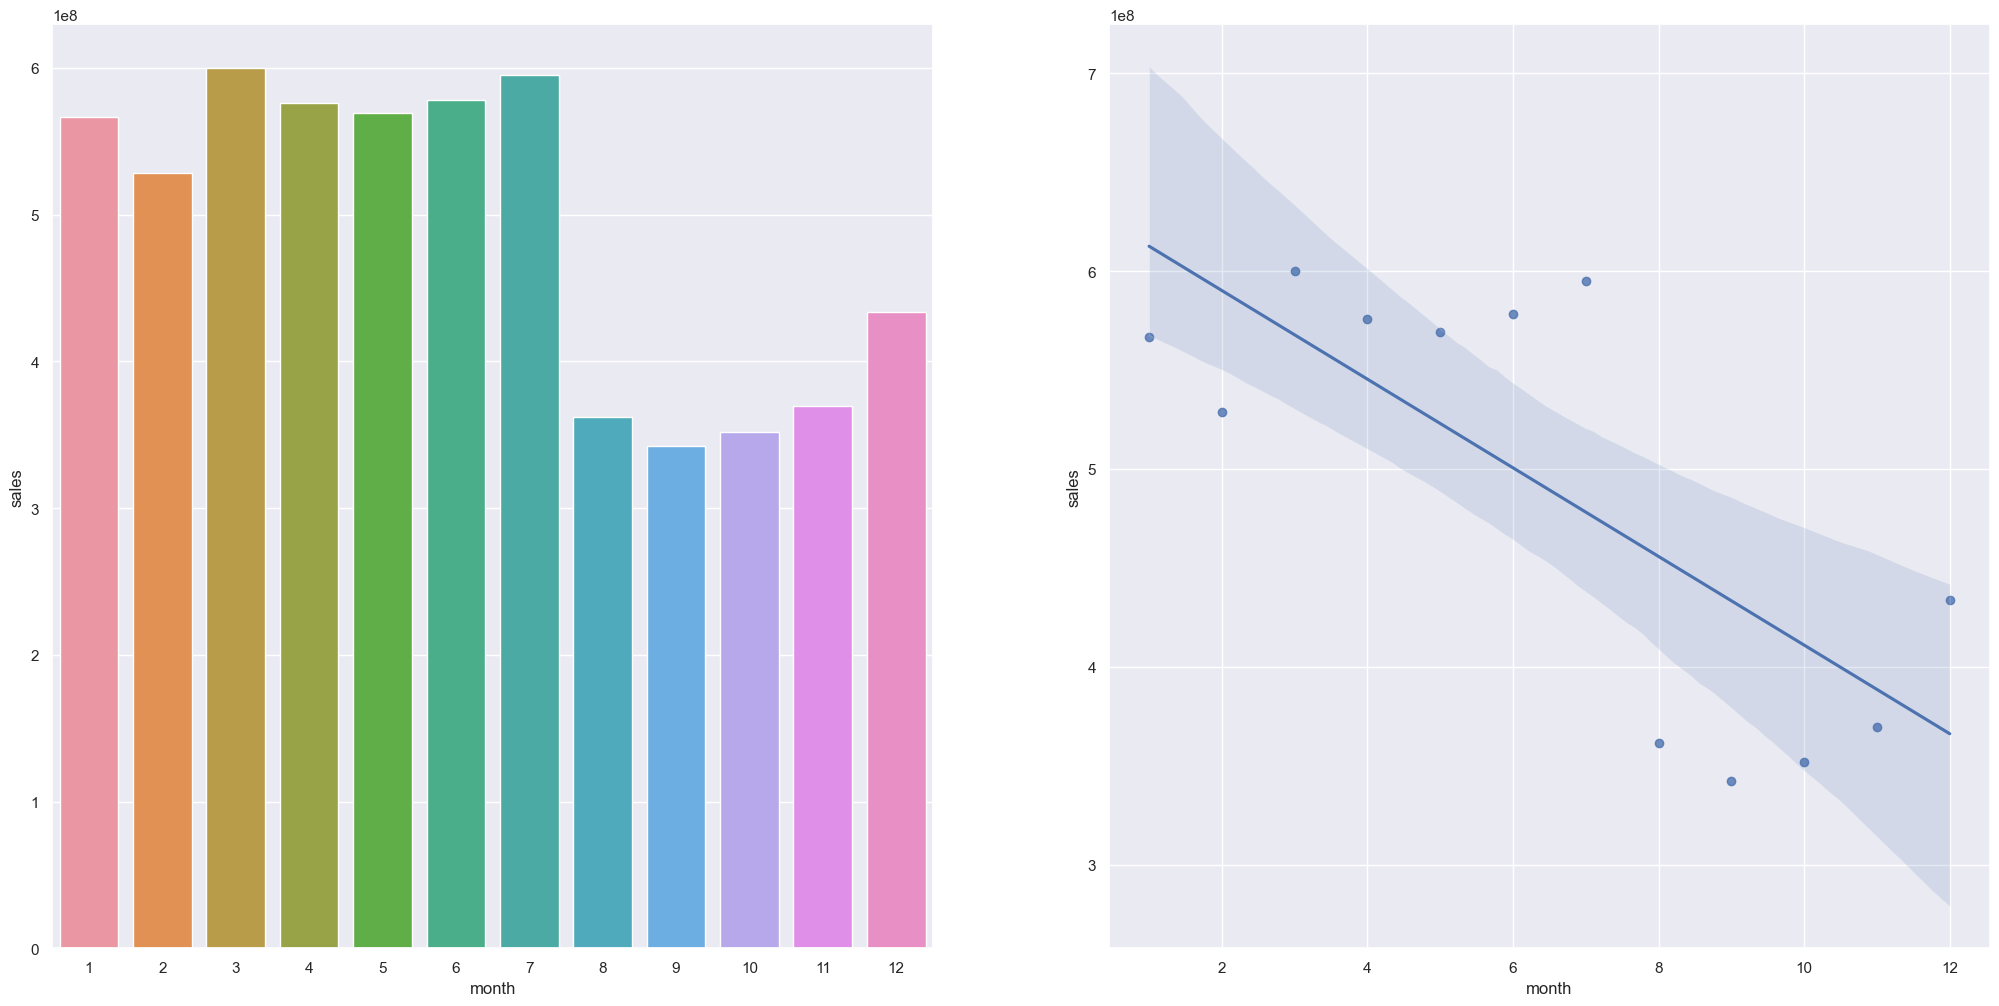

In [ ]:
# Agrupa as vendas por mês e somando
aux1 = df4[['sales', 'month']].groupby('month').sum().reset_index()

# Gráfico 1: Vendas totais por mês
plt.subplot(1, 2, 1)
sns.barplot(x='month', y='sales', data=aux1)

# Gráfico 2: Regressão de vendas por mês
plt.subplot(1, 2, 2)
sns.regplot(x='month', y='sales', data=aux1)

# aux = df4[df4['month'] > 6]
# aux2 = aux[['month', 'sales']].groupby('month').sum().reset_index()
# plt.subplot(1, 2, 2)
# sns.barplot(x='month', y='sales', data=aux2)


# Resumo das Hipóteses

In [ ]:

tab =[['Hipoteses', 'Conclusao', 'Relevancia'],
      ['H1', 'Falsa', 'Baixa'],
      ['H2', 'Falsa', 'Media'],
      ['H3', 'Falsa', 'Media'],
      ['H4', 'Falsa', 'Baixa'],
      ['H5', '-', '-'],
      ['H6', 'Falsa', 'Baixa'],
      ['H7', 'Falsa', 'Media'],
      ['H8', 'Falsa', 'Alta'],
      ['H9', 'Falsa', 'Alta'],
      ['H10', 'Verdadeira', 'Alta'],
      ['H11', 'Verdadeira', 'Alta'],
      ['H12', 'Verdadeira', 'Baixa'],
     ]
print( tabulate( tab, headers='firstrow' ) )

Hipoteses    Conclusao    Relevancia
-----------  -----------  ------------
H1           Falsa        Baixa
H2           Falsa        Media
H3           Falsa        Media
H4           Falsa        Baixa
H5           -            -
H6           Falsa        Baixa
H7           Falsa        Media
H8           Falsa        Alta
H9           Falsa        Alta
H10          Verdadeira   Alta
H11          Verdadeira   Alta
H12          Verdadeira   Baixa


# Análise Multivariada

# Numerical Attributes

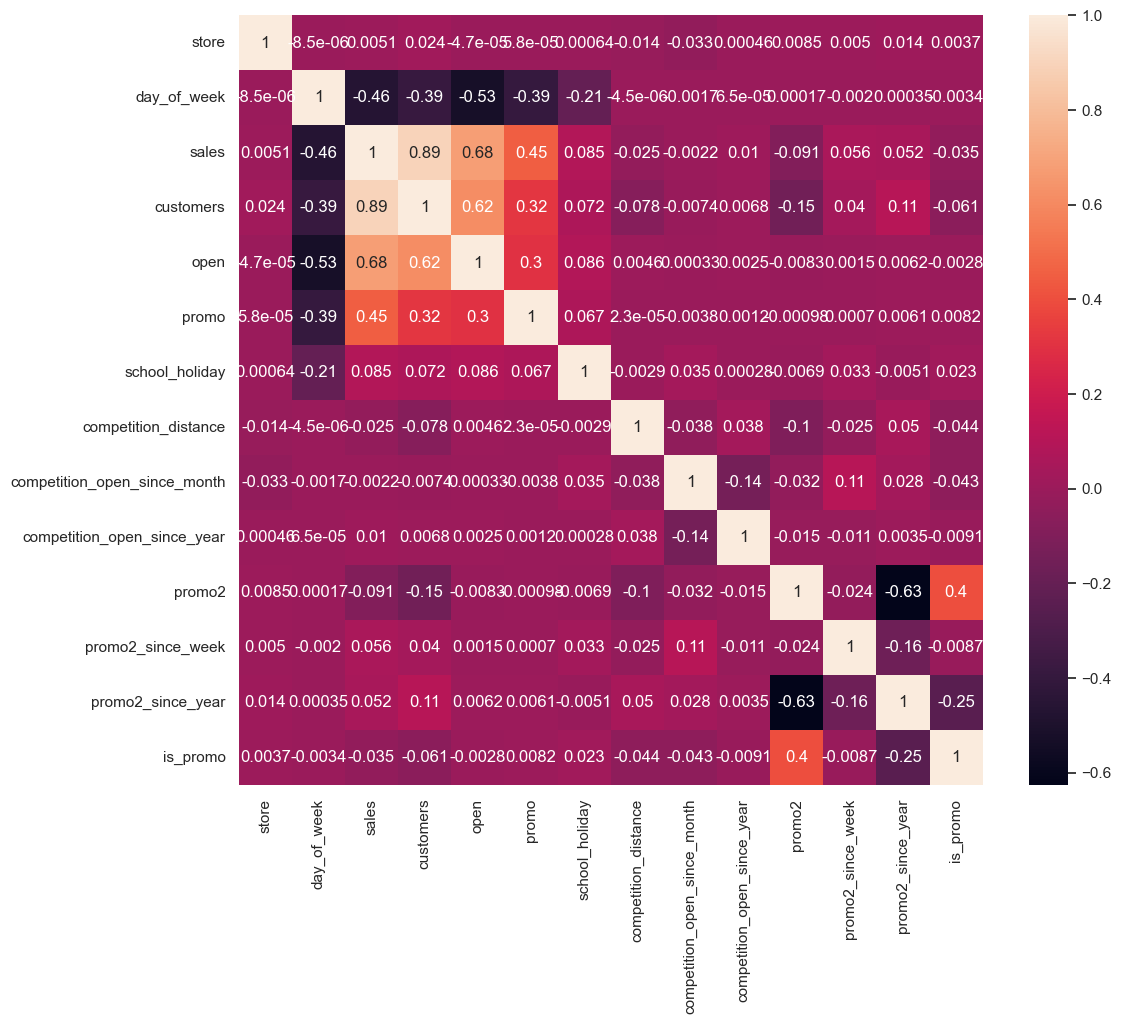

In [ ]:
# Cria uma figura com uma área de plotagem (ax) de tamanho 12x10
fig, ax = plt.subplots(figsize=(12, 10))

# Calcula a matriz de correlação usando o método de Pearson para os atributos numéricos do conjunto de dados
correlation = num_attributes.corr(method='pearson')

# Plota um mapa de calor (heatmap) dos valores de correlação na área de plotagem (ax)
# A opção annot=True exibe os valores numéricos no mapa de calor
sns.heatmap(correlation, annot=True);


# Categorical Attributes

<Axes: >

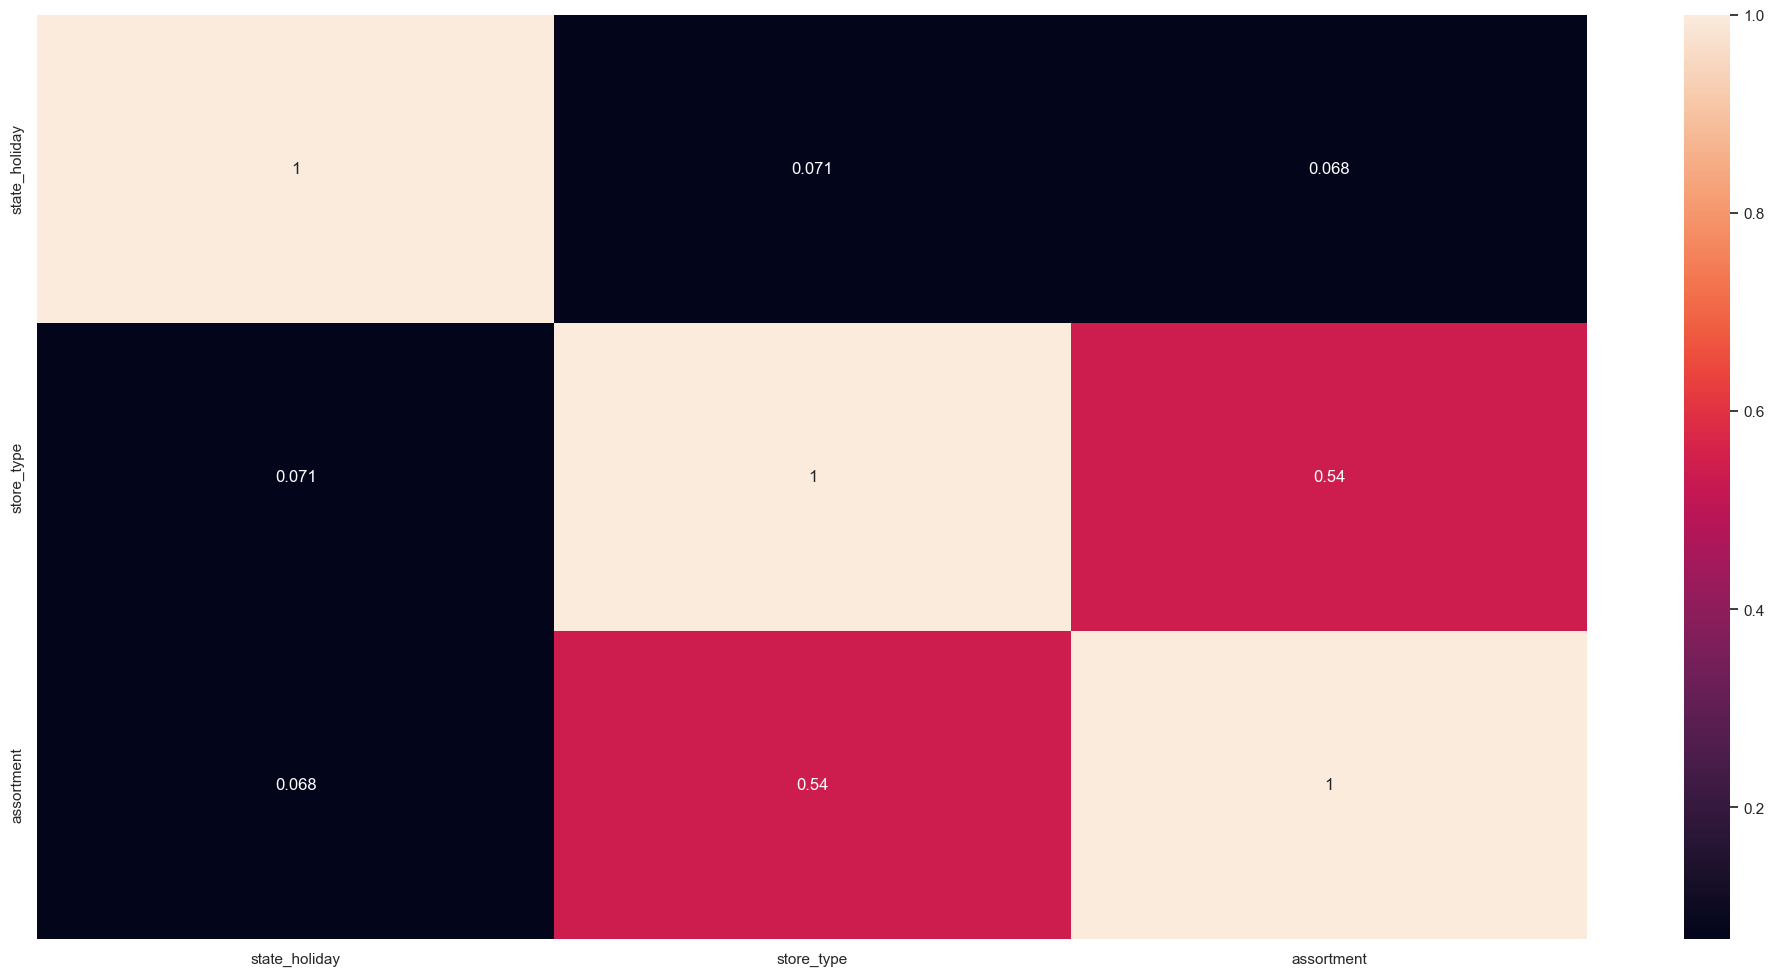

In [ ]:
# Seleciona apenas os dados categóricos
a = df4.select_dtypes( include='object' )

# Calcula Cramer V por cada par de variaveis categóricas
a1 = cramer_v( a['state_holiday'], a['state_holiday'] )
a2 = cramer_v( a['state_holiday'], a['store_type'] )
a3 = cramer_v( a['state_holiday'], a['assortment'] )
a4 = cramer_v( a['store_type'], a['state_holiday'] )
a5 = cramer_v( a['store_type'], a['store_type'] )
a6 = cramer_v( a['store_type'], a['assortment'] )
a7 = cramer_v( a['assortment'], a['state_holiday'] )
a8 = cramer_v( a['assortment'], a['store_type'] )
a9 = cramer_v( a['assortment'], a['assortment'] )

# Cria um dataset com os resultados
d = pd.DataFrame( {'state_holiday': [a1, a2, a3],
                    'store_type': [a4, a5, a6],
                    'assortment': [a7, a8, a9] })

# Define os nomes das colunas como o índice
d = d.set_index( d.columns )

# Cria um heatmap com os resultados
sns.heatmap( d, annot=True )

# MACHINE LEARNING MODELLING

# Compare Model’s Performance

In [ ]:
# Concatena os resultados da validação cruzada de quatro modelos de regressão 
# (Linear Regression, Lasso, Random Forest Regressor e XGBoost Regressor)
modelling_result_cv = pd.concat([lr_result_cv, lrr_result_cv, rf_result_cv, xgb_result_cv])

modelling_result_cv

,Model Name,MAE CV,MAPE CV,RMSE CV
0,Linear Regression,2081.73 +/- 295.63,0.3 +/- 0.02,2952.52 +/- 468.37
0,Lasso,2116.38 +/- 341.5,0.29 +/- 0.01,3057.75 +/- 504.26
0,Random Forest Regressor,836.61 +/- 217.1,0.12 +/- 0.02,1254.3 +/- 316.17
0,XGBoost Regressor,1064.94 +/- 178.65,0.15 +/- 0.02,1519.92 +/- 242.12


# <font color='blue'> 4. Conclusão & Demonstração </font>

# TRADUÇÃO E INTERPRETAÇÃO DO ERRO

# Business Performance

In [ ]:
# Ordena o df92 em ordem decrescente com base na coluna MAPE
df92.sort_values('MAPE', ascending=False).head()


,store,predictions,worst_scenario,best_scenario,MAE,MAPE
291,292,107259.992188,103900.995760,110618.988615,3358.996428,0.588526
908,909,218136.984375,210139.046769,226134.921981,7997.937606,0.523377
169,170,210068.781250,208498.057327,211639.505173,1570.723923,0.388486
901,902,202738.703125,201256.792243,204220.614007,1481.910882,0.369999
875,876,196581.156250,192483.555006,200678.757494,4097.601244,0.338941


<Axes: xlabel='store', ylabel='MAPE'>

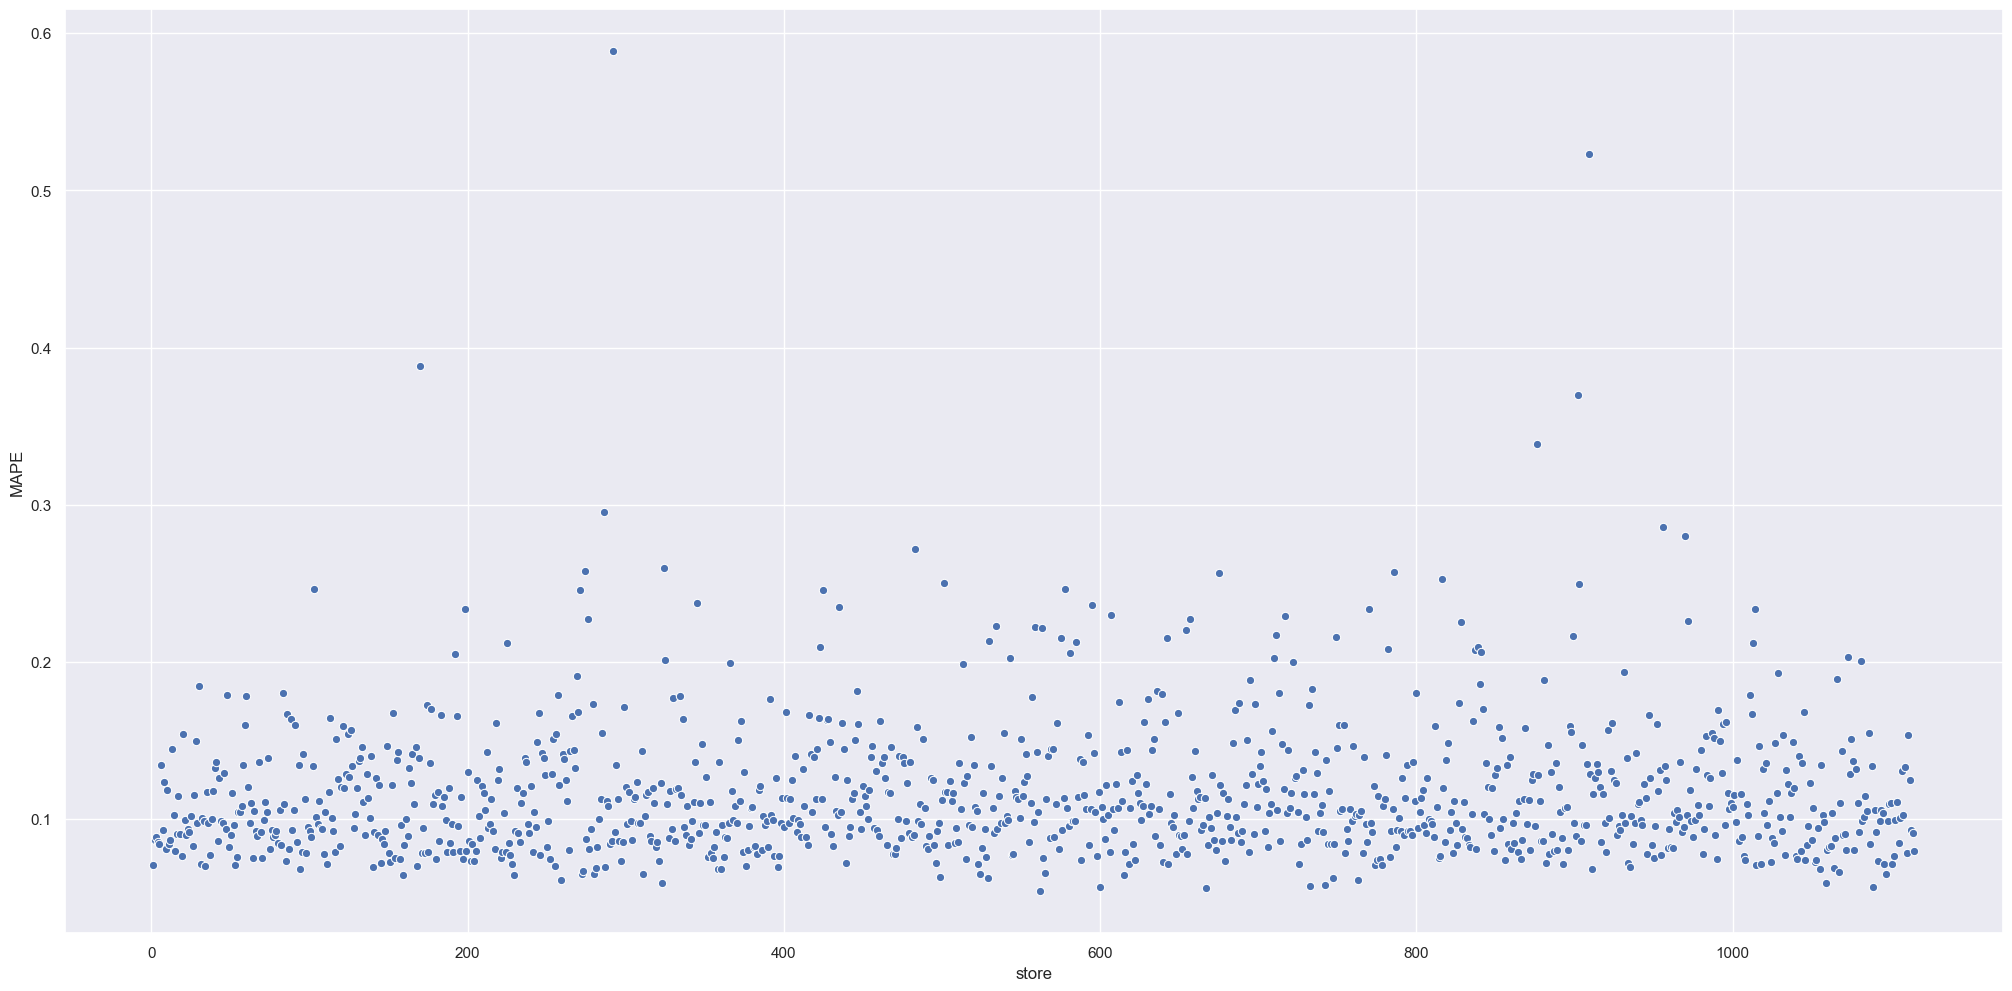

In [ ]:
# Gera um gráfico de dispersão. O gráfico mostra como os valores de MAPE variam em relação a cada loja (store).
sns.scatterplot(x='store', y='MAPE', data=df92)


# Total Performance

In [ ]:
# Cria um novo DataFrame df93 com as colunas 'predictions', 'worst_scenario' e 'best_scenario'
# Aplica uma função lambda em cada coluna para calcular a soma dos valores de cada uma delas
# A função lambda recebe como parâmetro uma série x de cada coluna, e aplica a função numpy.sum
# A opção axis=0 indica que a soma deve ser realizada em cada coluna
# A função reset_index() é utilizada para transformar o índice do DataFrame em uma coluna chamada 'index'
# Renomeia as colunas 'index' e 0 para 'Scenario' e 'Values', respectivamente
df93 = df92[['predictions', 'worst_scenario', 'best_scenario']].apply(lambda x: np.sum(x), axis=0).reset_index().rename(columns={'index': 'Scenario', 0: 'Values'})

# Aplica formatação de moeda nos valores da coluna 'Values'
df93['Values'] = df93['Values'].map('US${:,.2f}'.format)

df93


,Scenario,Values
0,predictions,"US$285,817,920.00"
1,worst_scenario,"US$284,955,855.73"
2,best_scenario,"US$286,679,971.81"


# Machine Learning Performance

<Axes: xlabel='predictions', ylabel='error'>

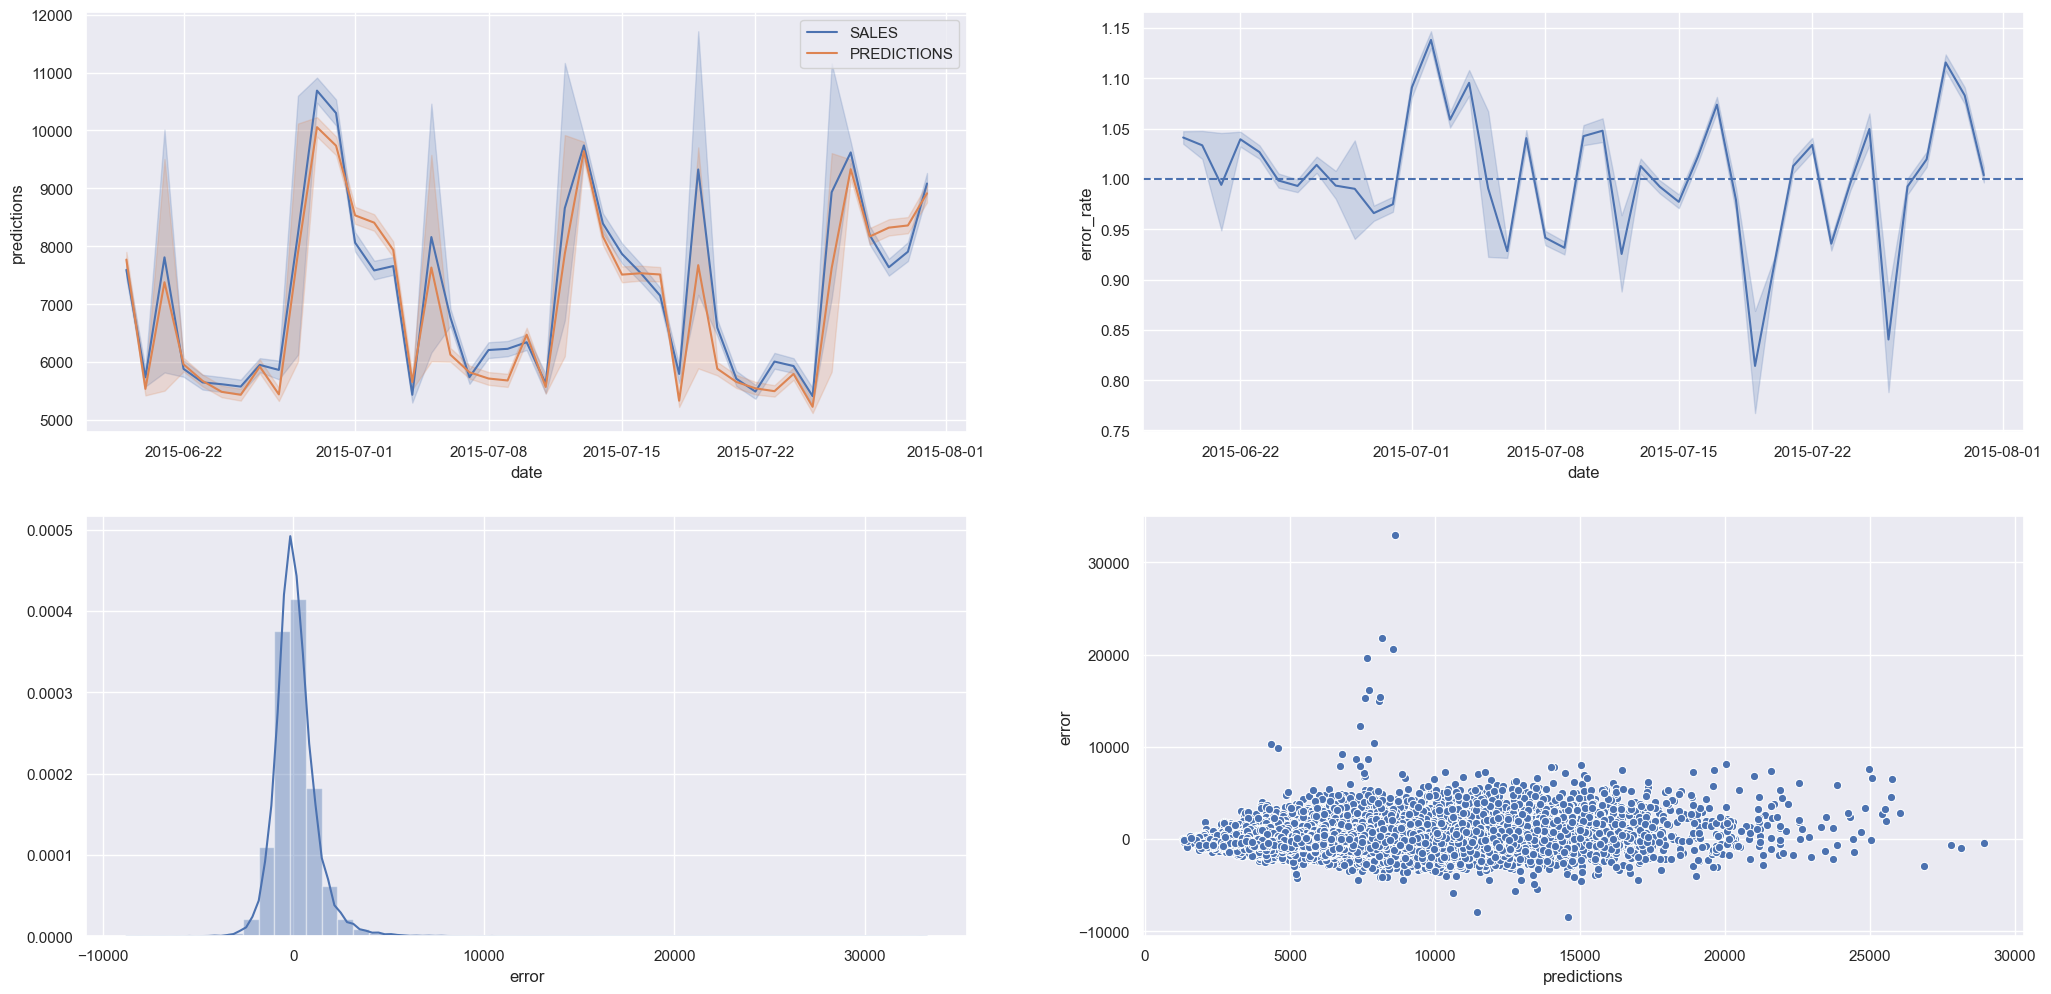

In [ ]:
# Gráfico 1: plota as vendas reais (sales) versus as previsões do modelo (predictions) ao longo do tempo.
plt.subplot(2, 2, 1)
sns.lineplot(x='date', y='sales', data=df9, label='SALES')
sns.lineplot(x='date', y='predictions', data=df9, label='PREDICTIONS')

# Gráfico 2: plota a taxa de erro (error_rate) do modelo ao longo do tempo e uma linha 
# pontilhada horizontal no valor de 1, que representa o limiar de aceitabilidade para essa métrica
plt.subplot(2, 2, 2)
sns.lineplot(x='date', y='error_rate', data=df9)
plt.axhline(1, linestyle='--')

# Gráfico 3: plota um histograma da distribuição dos erros do modelo
plt.subplot(2, 2, 3)
sns.distplot(df9['error'])

# Gráfico 4: é um scatterplot dos valores previstos (predictions) versus os erros do modelo
plt.subplot(2, 2, 4)
sns.scatterplot(x=df9['predictions'], y=df9['error'])


# MODEL TO PRODUCTION

# GIF TELEGRAM !!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!

# <font color='blue'> 5. Próximos Passos </font>

- Realizar um workshop do modelo para os usuários de negócios para garantir que atenda às suas necessidades e expectativas.
- Coletar feedbacks sobre a usabilidade do modelo para identificar quaisquer problemas e oportunidades de melhoria.
- Definir uma meta de aumentar a acurácia do modelo em 10%, trabalhando em melhorias específicas no processo de treinamento e validação.


# <font color='blue'> Q & A </font>

# <font color='blue'> Muito Obrigada! </font>